In [1]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-3.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 6.6 MB/s eta 0:00:11
   - -------------------------------------- 1.8/72.0 MB 4.4 MB/s eta 0:00:17
   - -------------------------------------- 2.6/72.0 MB 4.2 MB/s eta 0:00:17
   - -------------------------------------- 3.4/72.0 MB 4.1 MB/s eta 0:00:17
   -- ------------------------------------- 4.2/72.0 MB 4.0 MB/s eta 0:00:17
   -- ------------------------------------- 5.0/72.0 MB 4.0 MB/s eta 0:00:17
   --- ------------------------------------ 5.8/72.0 MB 3.9 MB/s eta 0:00:17
   --- ------------------------------------ 6.6/72.0 MB 3.9 MB/s eta 0:00:17
   ---- ----------------------------------- 7.3/72.0 MB 3.8 MB/s eta 0:00:17
   ---- ----------------------------------- 8.1/72.0 MB 3.8 MB/s eta 0:00:17
   ---- ----


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


1. importing the dependencies:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder# this dataset have lot of categorical encoder so we use this
from imblearn.over_sampling import SMOTE # this data set has imbalance in the target column, last column , more number of no.
                                            # SMOTE --> synthetic mynority over sampling --> we will be using that inorder to uniformly distributed target class..

from sklearn.model_selection import train_test_split, cross_val_score #we would have multiple folds and tryto verify the model

# reason for tree based model:
                    # it has kind of robustness and its not kind of sensitive to outlier and dont have to standardize the data.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
import pickle # pickle = save now, reuse later without extra work

2. Data Loading and Understanding

In [3]:
df = pd.read_csv("Customer_Churn.csv")

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.shape # no.of column and rows

(7043, 21)

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
pd.set_option("display.max_columns",None) # it won't trunkate the columns..

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.info() # show the null value and different datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# total charge is present in data type as object so we need to convert float 
# customer_id is not important 

In [11]:
#dropping customer_id columns as this is not required for modelling.
df = df.drop(columns = "customerID")

In [12]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [13]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
print(df["gender"].unique())

['Female' 'Male']


In [16]:
# print the unique values from all these columns.. 

for col in df.columns:
    print(col,df[col].unique())
    print("-"*50) 

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
-------

In [22]:
# to print categorical value unique features only, and exclude numerical features 

numerical_features_list = ["tenure","MonthlyCharges","TotalCharges"]

for col in df.columns:
    if col not in numerical_features_list:
        print(col,df[col].unique())
        print("-"*50) 

# senior citizen is okey because of binary class...

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [24]:
# count the number of missing values 
df.isnull().sum()

# no values are missing

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [29]:
# totalcharge columns--> we need to convert object type to float type.

# df["TotalCharges"] = df["TotalCharges"].astype(float)

 # could not convert string to float: ' '

In [26]:
df[df["TotalCharges"] ==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [28]:
len(df[df["TotalCharges"] == " "])


# 11 rows ,where the totalcharges value is empty..
# there is reason for this?
        # in some cases :
                    # tenure is 0 that means person not completed one month.
                    # tenure is not crossed so that person does not have to pay the total charges.
            # this is the reason for the empty..

11

In [31]:
# replace the totalcharges values

df["TotalCharges"] = df ["TotalCharges"].replace({" " : 0.0})

# first we replace the string, next we convert float

In [32]:
# previously we have empty space in the rows so we cant convert empty space in any types . so we convert 0.0 (string) to float is possible

df["TotalCharges"] = df["TotalCharges"].astype(float)

In [33]:
df.info()

# see the totalcharges column types it shows float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [36]:
# checking/understand the class distribution of the target columns:

print(df["Churn"].value_counts())

# we can see that clear imbalance in dataset..
#because of we cant train the model. 
# so we need to perform the upper sampling or down sampling.
# either to increase the minority class or decrease the majority class.

Churn
No     5174
Yes    1869
Name: count, dtype: int64


** INSIGHTS **

        1.Customer ID removed as it is not required for modelling
        2.No mmissing values in the dataset
        3.Missing values in the TotalCharges column were replaced with 0
        4.Class imbalance identified in the target

3.Exploratory Data Analysis

In [37]:
df.shape

(7043, 20)

In [38]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [39]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [40]:
# descriptive stastical value
df.describe()

# it only work on the numerical data types..

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# analyse the Numerical features 

    Understand the distribution of the numerical features

In [41]:
# set a theme using seaborn
# instead of trying to build a plot individual
# automate the plot

def plot_histogram (df,column_name):     # this is function has two parameter -> dataframe-> df and column_name

    plt.figure(figsize=(5,3))  # size is how large the graph should be!!
    sns.histplot(df[column_name],kde=True) # kernal density estimation.. drop the disttibution plot for the particular column_name
    plt.title(f"Distribution of {column_name}")

    # calculate the mean and median values for the columns
    col_mean = df[column_name].mean() #column name is a variable 
    col_median = df[column_name].median()

    # add vertical lines for mean and median ,, axvline-> axis_verticle_line
    plt.axvline(col_mean, color="red", linestyle = "--",label = "Mean")
    plt.axvline(col_median, color="green", linestyle = "-",label = "Median")

    plt.legend()

    plt.show()

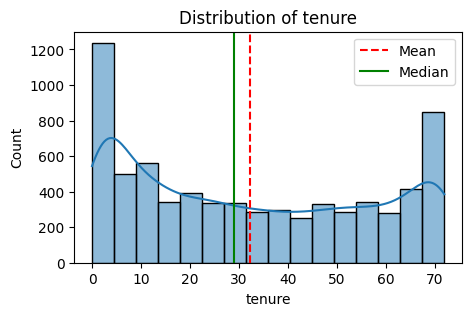

In [42]:
plot_histogram(df,"tenure")

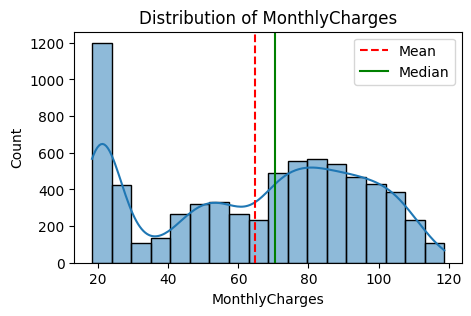

In [43]:
plot_histogram(df,"MonthlyCharges")

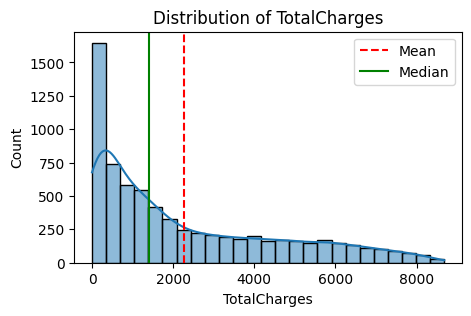

In [44]:
plot_histogram(df,"TotalCharges")

# in this some outlier are present , may or may not

#

# box plot for numerical values

box plot is used to find the outliers

In [47]:
def plot_boxplot (df,column_name):
    
    plt.figure(figsize=(5,3))  
    sns.boxplot(y=df[column_name])
    plt.title(f"Box Plot of {column_name}")
    plt.ylabel(column_name)
    plt.show

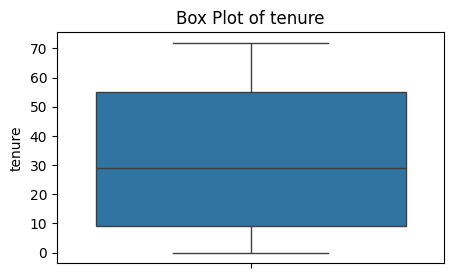

In [49]:
plot_boxplot(df,"tenure") 

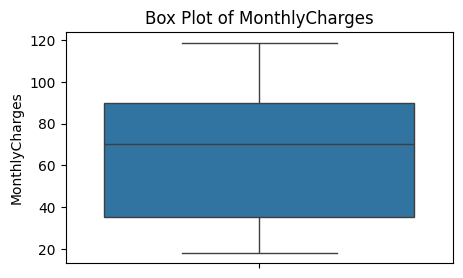

In [50]:
plot_boxplot(df, "MonthlyCharges")

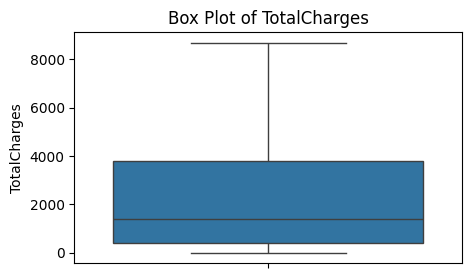

In [51]:
plot_boxplot(df, "TotalCharges")

# correlation heatmap for numerical features:

    to understand the replation between multiple numerical features

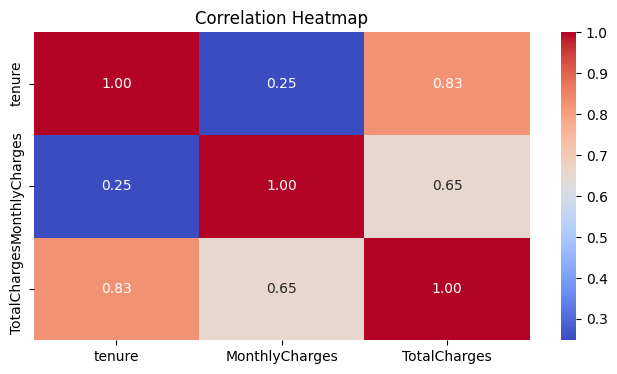

In [53]:
# correlation matrix - Heatmap

plt.figure(figsize=(8,4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 1 means i positive correlation , 0 means i negative correlation
# when two columns are very highly correlated we would drop one of the columns as this create multi-colinearity issues.
# ignor the diagonal --> tenure - tenure  ===1
# see the column tenure vs totalcharge ---> 0.83 high collinearity...
        # long tenure so charges are highcharges  , so it is not high collineariy

        # we dont drop tenure and totalcharges


# categorical features -- Analysis

In [54]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# "countplot for categorical columns"

In [56]:


obj_columns = df.select_dtypes(include = "object").columns.to_list()

obj_columns = ["SeniorCitizen"] + obj_columns
obj_columns

# we have all the columns created annd use the for loop for count plot

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

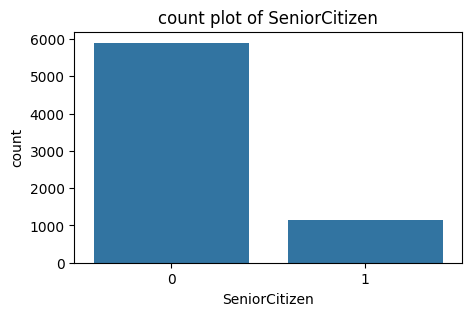

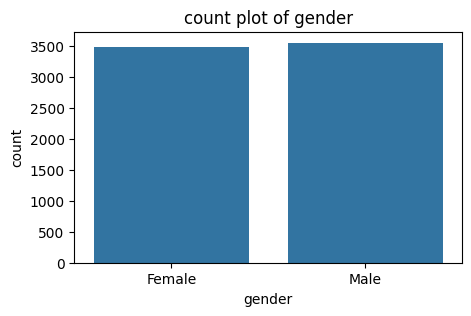

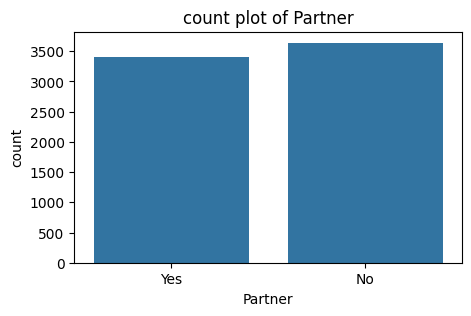

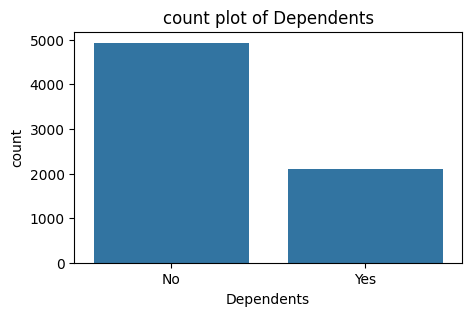

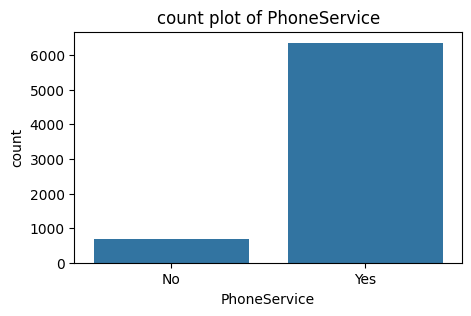

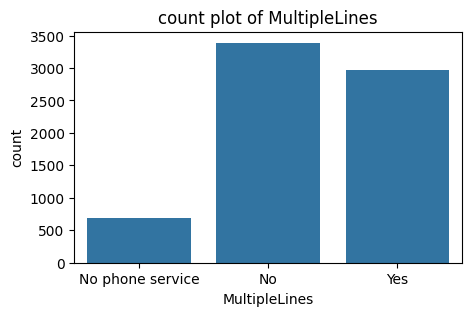

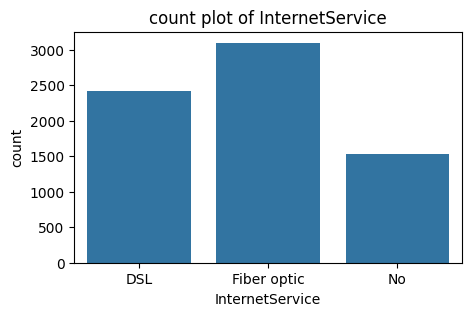

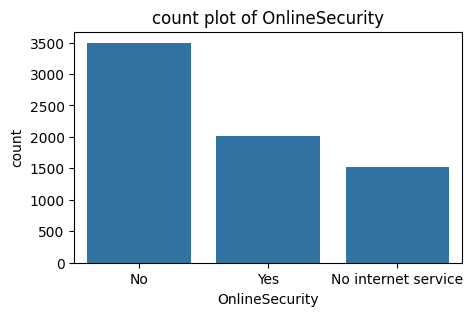

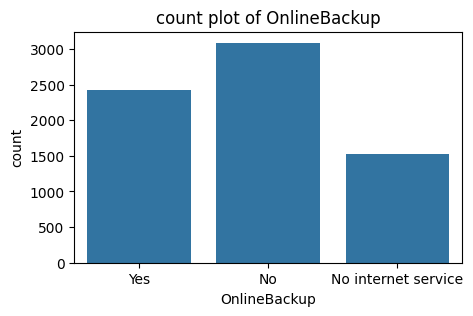

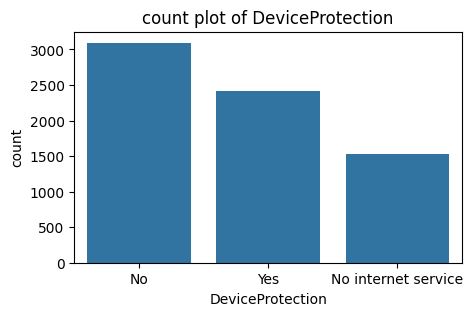

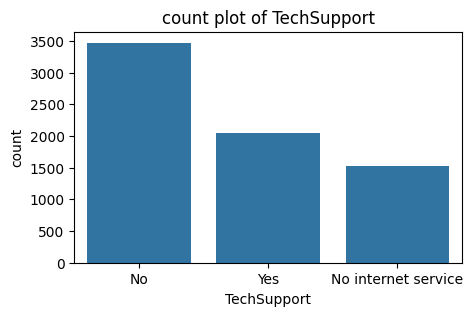

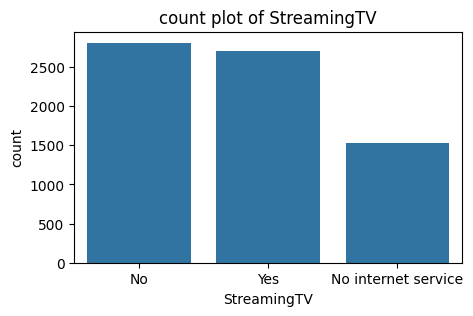

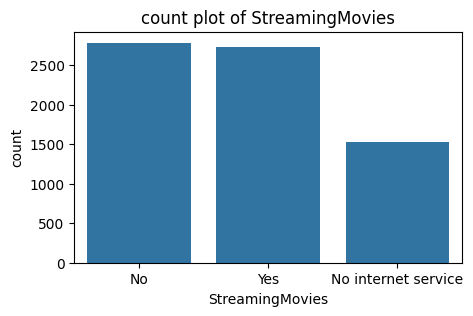

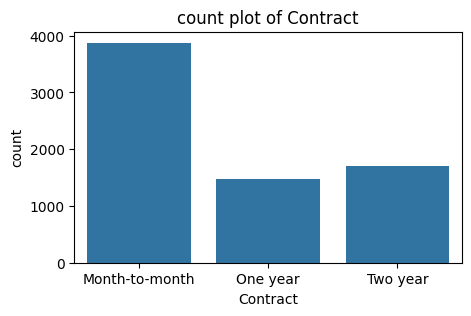

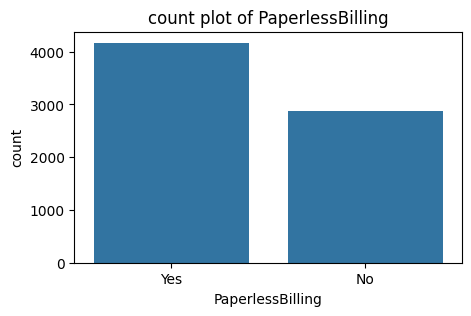

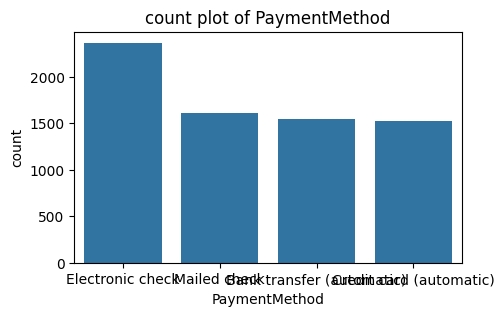

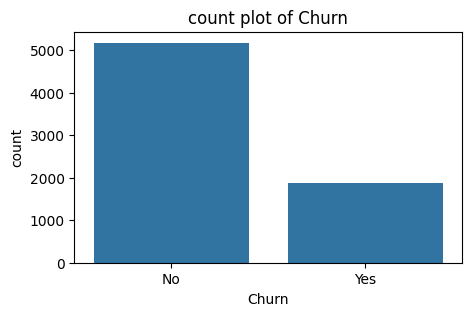

In [58]:
# counplot how these data are distributed

obj_columns = df.select_dtypes(include = "object").columns.to_list()

obj_columns = ["SeniorCitizen"] + obj_columns

for col in obj_columns:
    plt.figure(figsize = (5,3))
    sns.countplot(x=df[col])
    plt.title(f"count plot of {col}")
    plt.show()

# 4. Data Preprocessing

In [59]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


# label encoding of target column

In [61]:
# we dot have to put label encode func ---> instead we put replace function

df["Churn"] = df["Churn"].replace({"Yes":1,"No":0})

C:\Users\gowtham\AppData\Local\Temp\ipykernel_18736\768492104.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes":1,"No":0})


In [62]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [63]:
print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


 # label encoding for the categorical features--

In [64]:
# we have to use multiple label encoders ,so we first need to identify columns with object datatype

object_columns = df.select_dtypes(include="object").columns

In [65]:
object_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [70]:
#create label encoders , use for loop --> automatically encode all these columns in 1 go!!
import pickle

 initialize a dictionary to save the encoders:
encoders = {} --> initiating the empty dic, called encoders , this is where the individual encoders of all these columns are saved, 

apply label encoding and store the encoders:

for column in object_columns:
    label_encoder =  LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoder[column] = label_encoder

 save the encoders to a pickle file
with open ("encoder.pkl","wb") as f:
    pickle.dump(encoders, f)

    # we have save this label encoders to a dictionary , we are saving this because when we are transforming a new unknow data we have to use the same label encoder..

    label encoding is sufficient for xgboost,, also try one-hot encoding..

In [71]:
# initialize a dictionary to save the encoders:
encoders = {}

# apply label encoding and store the encoders:

for column in object_columns:
    label_encoder =  LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder

# save the encoders to a pickle file
with open ("encoder.pkl","wb") as f:
    pickle.dump(encoders, f)

In [72]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# training and Test data split

In [73]:
# before split train and test, first separate the features and target separately..

x = df.drop(columns = ["Churn"]) 
y = df ["Churn"] # in y we keep the churn column

In [74]:
#see the x and y
x # we see all the column except churn columns

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [75]:
y # only one column ie churn column..

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [77]:
 # split the training the testing data

x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# all the training data features goes to the x train and the corresponding labels are the target values for those features are stored in y train.
#similarly, test data features are stored in x test, test data target stored in y test)
# test_size = 20% , 80 % ->> training.

In [78]:
y_train.shape

(5634,)

In [79]:
y_train.value_counts()

# see some imbalace , so we will perform SMOTE technique..

Churn
0    4138
1    1496
Name: count, dtype: int64

# synthetic Mynority Oversampling Technique (SMOTE)


In [80]:
smote  = SMOTE(random_state=42)

In [81]:
# now we try to oversample this

# smote is done on the training data
# SMOTE finds the minority class and oversamples it to make the dataset balanced.

x_train_smote, y_train_smote = smote.fit_resample(x_train,y_train)

In [82]:
y_train_smote.shape

(8276,)

In [84]:
y_train_smote.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64

# 5. model training

training with default hyperparameters 

In [101]:
# create a dictionary of models

models = {
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

# here not do training accuracy instead give cross validation

# cross val--> give like more rounded result

In [ ]:
# dic to store the cross validation results

cv_score = {}

# perform 5- folds cross validation for each models

# for model_name, models in models.items():
#     print(f"Training{model_name} with default_parameters")
#     scores = cross_val_score(model, x_train_smote, y_train_smote, cv=5, scoring="accuracy") # actual cross val done.. cv =5 , 5 folds..
#     cv_score[model_name] = scores
#     print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
#     print("-"*70) 

In [104]:
# dic to store the cross validation results

cv_scores = {}

# perform 5- folds cross validation for each models

for model_name, model in models.items():
    print(f"Training {model_name} with default_parameters")
    scores = cross_val_score(model, x_train_smote, y_train_smote, cv=5, scoring="accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
    print("-"*70) 

Training Decision Tree with default_parameters
Decision Tree cross-validation accuracy: 0.78
----------------------------------------------------------------------
Training Random Forest with default_parameters
Random Forest cross-validation accuracy: 0.84
----------------------------------------------------------------------
Training XGBoost with default_parameters
XGBoost cross-validation accuracy: 0.83
----------------------------------------------------------------------


In [105]:
# see the exact scores

cv_scores # mean of these 5 values..
# first 2 folds less accuracy next 3 is 0.9 good accuracy..

{'Decision Tree': array([0.69202899, 0.70574018, 0.82537764, 0.83806647, 0.84350453]),
 'Random Forest': array([0.73067633, 0.77039275, 0.90392749, 0.89969789, 0.90030211]),
 'XGBoost': array([0.70833333, 0.76132931, 0.90453172, 0.88821752, 0.90755287])}

# random forest gives the highest accuracy to other models with defalut parameters: 0.84

In [106]:
# train the random forest classifier
rfc = RandomForestClassifier(random_state = 42)

In [111]:
rfc.fit(x_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [112]:
print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


# evalute on test data


In [114]:
y_test_pred = rfc.predict(x_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confsuion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.7785663591199432
Confsuion Matrix:
 [[878 158]
 [154 219]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



#  save the trained model as a pickle file

In [116]:
model_data = {"model": rfc, "features_names": x.columns.tolist()} # x we drop the churn that is..


with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

# 7. load the saved model and build a predictive system..

In [117]:
# load the saved model and the feature names:

with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [118]:
print(loaded_model) # this is trained random model classifier..

RandomForestClassifier(random_state=42)


In [119]:
print(feature_names) 

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [ ]:
# make new unknown value and make prediction,
#copy the csv file --> first name dont copy churn.
# ask gemini to convert into dictionary

input_data = {          # unknow new data 
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

 # convert this dictionary into dataframe.
input_data_df = pd.DataFrame([input_data]) # this should be send in a list

#we have to open the encoders, we need to perfrom label encoders..
with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)


# encode categorical features using the saved label encoders.
for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

    [0]
    Prediction: No Churn
    Prediciton Probability: [[0.78 0.22]]

In [126]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}